In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def buildBN_beforeActivation(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZES = [2, 16, 32, 128, 256] 
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZES:
    model = buildBN_beforeActivation(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "BATCH_SIZE %s" %(BATCH_SIZE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)              

25000/25000 [==============================] - 98s 4ms/step - loss: 2.2043 - accuracy: 0.1891 - val_loss: 269.5346 - val_accuracy: 0.2212
Epoch 47/50
25000/25000 [==============================] - 98s 4ms/step - loss: 2.1962 - accuracy: 0.1932 - val_loss: 524.9297 - val_accuracy: 0.2107
Epoch 48/50
25000/25000 [==============================] - 97s 4ms/step - loss: 2.1966 - accuracy: 0.1912 - val_loss: 170.0464 - val_accuracy: 0.2033
Epoch 49/50
25000/25000 [==============================] - 98s 4ms/step - loss: 2.1963 - accuracy: 0.1937 - val_loss: 351.5396 - val_accuracy: 0.1883
Epoch 50/50
25000/25000 [==============================] - 99s 4ms/step - loss: 2.1942 - accuracy: 0.1921 - val_loss: 391.3008 - val_accuracy: 0.1989
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
__________________________________________

3125/3125 [==============================] - 25s 8ms/step - loss: 0.6245 - accuracy: 0.7777 - val_loss: 1.5816 - val_accuracy: 0.5516
Epoch 43/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.6123 - accuracy: 0.7806 - val_loss: 1.5743 - val_accuracy: 0.5510
Epoch 44/50
3125/3125 [==============================] - 22s 7ms/step - loss: 0.6052 - accuracy: 0.7855 - val_loss: 1.5893 - val_accuracy: 0.5510
Epoch 45/50
3125/3125 [==============================] - 22s 7ms/step - loss: 0.5937 - accuracy: 0.7881 - val_loss: 1.6118 - val_accuracy: 0.5466
Epoch 46/50
3125/3125 [==============================] - 19s 6ms/step - loss: 0.5890 - accuracy: 0.7921 - val_loss: 1.6205 - val_accuracy: 0.5521
Epoch 47/50
3125/3125 [==============================] - 20s 6ms/step - loss: 0.5859 - accuracy: 0.7924 - val_loss: 1.6217 - val_accuracy: 0.5509
Epoch 48/50
3125/3125 [==============================] - 21s 7ms/step - loss: 0.5735 - accuracy: 0.7942 - val_loss: 1.6277 - val_accurac

1563/1563 [==============================] - 15s 10ms/step - loss: 0.3598 - accuracy: 0.8712 - val_loss: 2.0025 - val_accuracy: 0.5345
Epoch 39/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3454 - accuracy: 0.8785 - val_loss: 1.9989 - val_accuracy: 0.5390
Epoch 40/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3287 - accuracy: 0.8845 - val_loss: 2.0216 - val_accuracy: 0.5353
Epoch 41/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3272 - accuracy: 0.8837 - val_loss: 2.0517 - val_accuracy: 0.5360
Epoch 42/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3259 - accuracy: 0.8845 - val_loss: 2.0654 - val_accuracy: 0.5325
Epoch 43/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3133 - accuracy: 0.8890 - val_loss: 2.1029 - val_accuracy: 0.5346
Epoch 44/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3076 - accuracy: 0.8908 - val_loss: 2.0936 - val_

Epoch 35/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1149 - accuracy: 0.9663 - val_loss: 2.3672 - val_accuracy: 0.5156
Epoch 36/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1183 - accuracy: 0.9632 - val_loss: 2.3873 - val_accuracy: 0.5157
Epoch 37/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1084 - accuracy: 0.9685 - val_loss: 2.3842 - val_accuracy: 0.5189
Epoch 38/50
391/391 [==============================] - 7s 18ms/step - loss: 0.1016 - accuracy: 0.9702 - val_loss: 2.4115 - val_accuracy: 0.5214
Epoch 39/50
391/391 [==============================] - 7s 19ms/step - loss: 0.0942 - accuracy: 0.9731 - val_loss: 2.4645 - val_accuracy: 0.5166
Epoch 40/50
391/391 [==============================] - 7s 18ms/step - loss: 0.0998 - accuracy: 0.9699 - val_loss: 2.4440 - val_accuracy: 0.5247
Epoch 41/50
391/391 [==============================] - 7s 18ms/step - loss: 0.0921 - accuracy: 0.9727 - val_loss: 2.4890 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 0.1437 - accuracy: 0.9684 - val_loss: 2.0570 - val_accuracy: 0.5123
Epoch 33/50
196/196 [==============================] - 5s 24ms/step - loss: 0.1332 - accuracy: 0.9713 - val_loss: 2.0973 - val_accuracy: 0.5144
Epoch 34/50
196/196 [==============================] - 5s 24ms/step - loss: 0.1219 - accuracy: 0.9745 - val_loss: 2.1116 - val_accuracy: 0.5130
Epoch 35/50
196/196 [==============================] - 5s 24ms/step - loss: 0.1045 - accuracy: 0.9798 - val_loss: 2.1487 - val_accuracy: 0.5094
Epoch 36/50
196/196 [==============================] - 5s 24ms/step - loss: 0.0981 - accuracy: 0.9808 - val_loss: 2.2016 - val_accuracy: 0.5123
Epoch 37/50
196/196 [==============================] - 5s 25ms/step - loss: 0.0913 - accuracy: 0.9830 - val_loss: 2.2413 - val_accuracy: 0.5173
Epoch 38/50
196/196 [==============================] - 5s 24ms/step - loss: 0.0865 - accuracy: 0.9843 - val_loss: 2.2437 - val_accuracy: 0.5176
Epoc

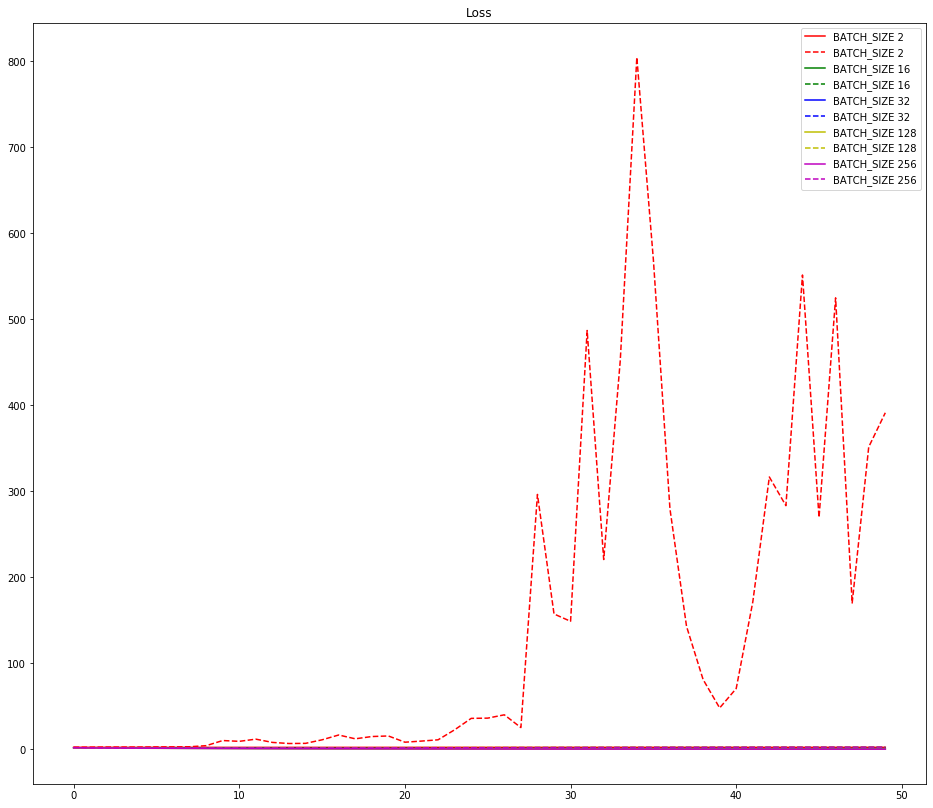

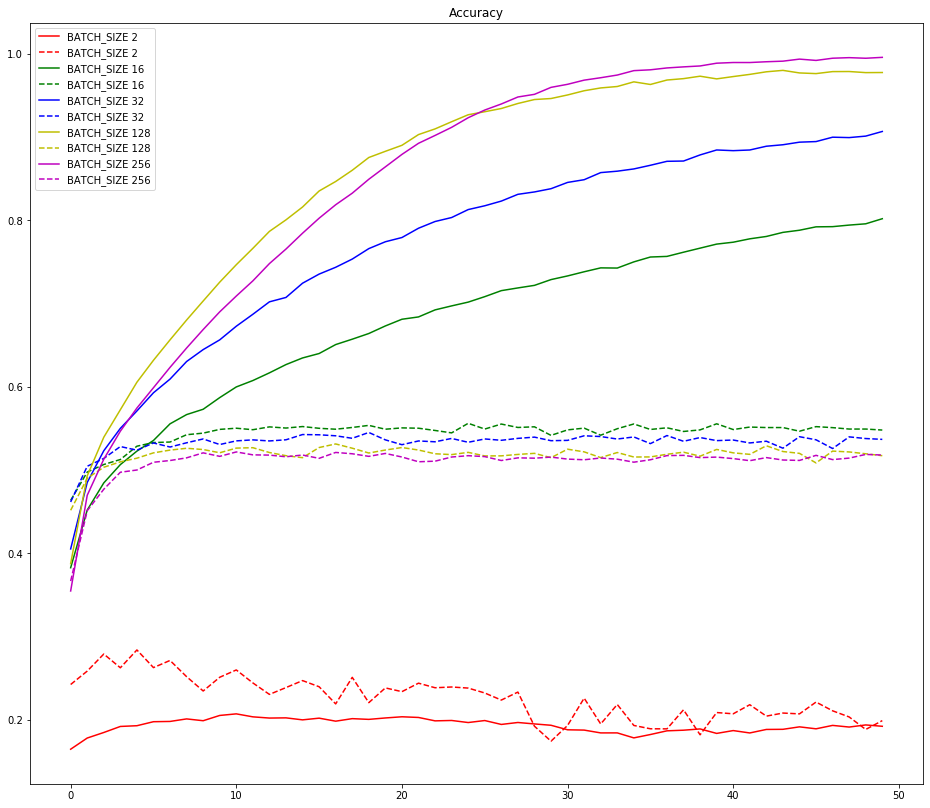

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()